In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# select categorical features
def get_categorical_features(df):
    categorical_features = df.select_dtypes(exclude=[np.number]).columns
    return categorical_features

# select numerical features
def get_numerical_features(df):
    numerical_features = df.select_dtypes(include=[np.number]).columns
    return numerical_features

def generate_summary_table(df, nunique_threshold=100):
    numerical_features = get_numerical_features(df)

    summary_table = pd.DataFrame({
        'column':   df.columns,
        'dtype':    df.dtypes,
        'count':    df.count(),
        'mean':     [round(df[col].mean(), 1) if col in numerical_features else '' for col in df.columns],
        'std':      [round(df[col].std(), 1) if col in numerical_features else '' for col in df.columns],
        'min':      [round(df[col].min(), 1) if col in numerical_features else '' for col in df.columns],
        '25%':      [round(df[col].quantile(0.25), 1) if col in numerical_features else '' for col in df.columns],
        '50%':      [round(df[col].median(), 1) if col in numerical_features else '' for col in df.columns],
        '75%':      [round(df[col].quantile(0.75), 1) if col in numerical_features else '' for col in df.columns],
        'max':      [round(df[col].max(), 1) if col in numerical_features else '' for col in df.columns],
        'nunique':  df.nunique(),
        'unique':   [list(df[col].unique()) if df[col].nunique() < nunique_threshold else '' for col in df.columns],
        'mode':     [df[col].mode()[0] if not df[col].mode().empty else '' for col in df.columns],
        'is_nan':   [df[col].isna().sum() if col in numerical_features else '' for col in df.columns],
        'null #':   df.isnull().sum(),
        'null %':   round(df.isnull().mean() * 100, 2)
    })

    summary_table = summary_table.sort_values(by='dtype')
    return summary_table

In [3]:
df = pd.read_csv('data/kc_house_data_NaN.csv').drop(columns='Unnamed: 0')

In [4]:
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900,3.0,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000,3.0,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000,2.0,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000,4.0,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000,3.0,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [5]:
df['date'] = pd.to_datetime(df['date'], format='%Y%m%dT%H%M%S')
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,2014-10-13,221900,3.0,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,2014-12-09,538000,3.0,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,2015-02-25,180000,2.0,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,2014-12-09,604000,4.0,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,2015-02-18,510000,3.0,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [6]:
generate_summary_table(df)

,column,dtype,count,mean,std,min,25%,50%,75%,max,nunique,unique,mode,is_nan,null #,null %
id,id,int64,21613,4580301520.9,2876565571.3,1000102,2123049194.0,3904930410.0,7308900445.0,9900000190,21436,,795000620,0,0,0.00
zipcode,zipcode,int64,21613,98077.9,53.5,98001,98033.0,98065.0,98118.0,98199,70,"[98178, 98125, 98028, 98136, 98074, 98053, 980...",98103,0,0,0.00
yr_renovated,yr_renovated,int64,21613,84.4,401.7,0,0.0,0.0,0.0,2015,70,"[0, 1991, 2002, 2010, 1999, 1992, 2013, 1994, ...",0,0,0,0.00
yr_built,yr_built,int64,21613,1971.0,29.4,1900,1951.0,1975.0,1997.0,2015,116,,2014,0,0,0.00
sqft_basement,sqft_basement,int64,21613,291.5,442.6,0,0.0,0.0,560.0,4820,306,,0,0,0,0.00
sqft_above,sqft_above,int64,21613,1788.4,828.1,290,1190.0,1560.0,2210.0,9410,946,,1300,0,0,0.00
grade,grade,int64,21613,7.7,1.2,1,7.0,7.0,8.0,13,12,"[7, 6, 8, 11, 9, 5, 10, 12, 4, 3, 13, 1]",7,0,0,0.00
sqft_living15,sqft_living15,int64,21613,1986.6,685.4,399,1490.0,1840.0,2360.0,6210,777,,1540,0,0,0.00
view,view,int64,21613,0.2,0.8,0,0.0,0.0,0.0,4,5,"[0, 3, 4, 2, 1]",0,0,0,0.00
condition,condition,int64,21613,3.4,0.7,1,3.0,3.0,4.0,5,5,"[3, 5, 4, 1, 2]",3,0,0,0.00


### initial notes from first look at  data
not many missing numbers/nans just in bathrooms and bedrooms. small amount would not affect the model so will drop them
- bedrooms should be int not float
- bucket the sizes of property 
- bucket year renovated. look at variance that year renovated has on values 
    - eg 20+years, 20-10year, 10 years 5 years?
- same for year built. or convert to age so numberical feature not categorical
- date previously sold 
- plot lat long to see if clustering them together adds value 
- condition and grade are categorical feature column not numberical. 
- waterfront is a binary column 
- use the sqftliving and sqftliving to look if renovations have been done. 
- potential error in bedrooms as max value is 33 with the next closest being 11. I will drop this.

| categorical features | numberical features |
| --- | --- |
|waterfront | price |
| view | bedrooms |
| condition | bathrooms |
| grade | sqft_living |
| yr_built | sqft_lot |
| yr_renovated | floors |
| zipcode | sqft_above |
| date|  sqft_basement|
| | lat |
| |long  |


In [7]:
print(df.shape)
df.dropna(inplace=True)
df = df[df.bedrooms != 33] # probable error
print(df.shape)
df['bedrooms'] = df['bedrooms'].astype('int')




(21613, 21)
(21596, 21)


In [8]:
generate_summary_table(df)

,column,dtype,count,mean,std,min,25%,50%,75%,max,nunique,unique,mode,is_nan,null #,null %
bedrooms,bedrooms,int32,21596,3.4,0.9,1,3.0,3.0,4.0,11,11,"[3, 2, 4, 5, 1, 6, 7, 8, 9, 11, 10]",3,0,0,0.0
id,id,int64,21596,4580575157.1,2876764127.6,1000102,2123049166.8,3904930470.0,7308950385.0,9900000190,21419,,795000620,0,0,0.0
zipcode,zipcode,int64,21596,98078.0,53.5,98001,98033.0,98065.0,98118.0,98199,70,"[98178, 98125, 98028, 98136, 98074, 98053, 980...",98103,0,0,0.0
yr_renovated,yr_renovated,int64,21596,84.5,401.8,0,0.0,0.0,0.0,2015,70,"[0, 1991, 2002, 2010, 1999, 1992, 2013, 1994, ...",0,0,0,0.0
yr_built,yr_built,int64,21596,1971.0,29.4,1900,1951.0,1975.0,1997.0,2015,116,,2014,0,0,0.0
sqft_basement,sqft_basement,int64,21596,291.7,442.7,0,0.0,0.0,560.0,4820,306,,0,0,0,0.0
sqft_above,sqft_above,int64,21596,1788.6,827.8,370,1190.0,1560.0,2210.0,9410,942,,1300,0,0,0.0
grade,grade,int64,21596,7.7,1.2,3,7.0,7.0,8.0,13,11,"[7, 6, 8, 11, 9, 5, 10, 12, 4, 3, 13]",7,0,0,0.0
sqft_living15,sqft_living15,int64,21596,1986.7,685.2,399,1490.0,1840.0,2360.0,6210,777,,1540,0,0,0.0
condition,condition,int64,21596,3.4,0.7,1,3.0,3.0,4.0,5,5,"[3, 5, 4, 1, 2]",3,0,0,0.0


## feature engineering for eda

In [9]:
#transform year built to ages of the property 
df['age_of_property'] = 2024 - df.yr_built 

#binary flag for change in sqft
df['change_sqft_living'] = (df['sqft_living'] != df['sqft_living15']).astype(int)

df['change_sqft_lot'] = (df['sqft_lot'] != df['sqft_lot15']).astype(int) 
# df.sqft_lot - df.sqft_lot15

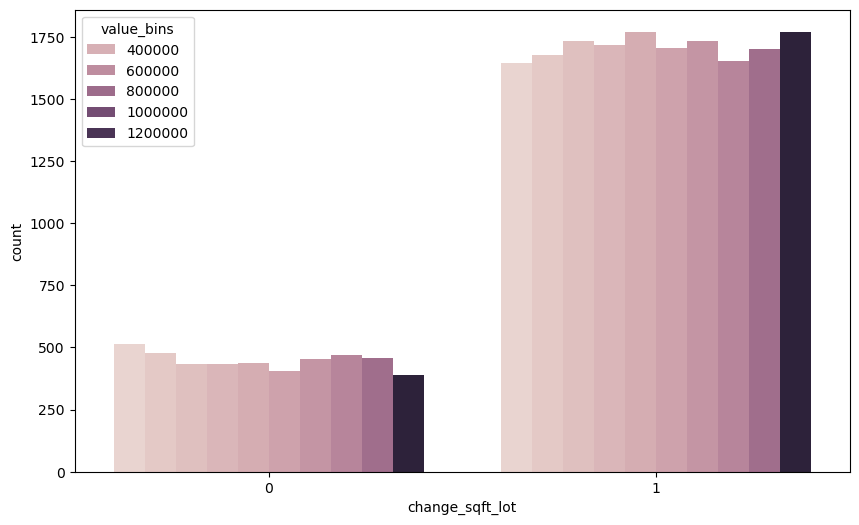

<Figure size 1000x600 with 0 Axes>

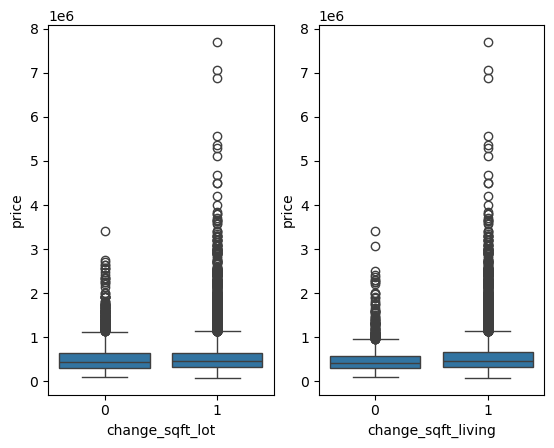

In [10]:
plt.figure(figsize=(10,6))
df['value_bins'] = pd.qcut(df['price'], 10, labels=False)
bin_averages = df.groupby('value_bins')['price'].mean() 
df['value_bins'] = df['value_bins'].apply(lambda x: bin_averages[x])
sns.countplot(x='change_sqft_lot', data=df,hue= 'value_bins')
plt.show()

plt.figure(figsize=(10,6))
fig, axs = plt.subplots(1,2)
sns.boxplot(x = 'change_sqft_lot',y = 'price',data=df, ax=axs[0])
sns.boxplot(x = 'change_sqft_living',y = 'price',data=df, ax=axs[1])
plt.show()

there is a differnce it change by using the binary flaging but it appear that the means of the binary flag are very similar. 
next i will try and replicate this but taking into acount the value of the change in sqft into 3 groups -1 for -ve 0 for no change and 1 for +ve change

In [11]:
df['change_sqft_living'] = (df['sqft_living15'] - df['sqft_living']).astype(int)
df['change_sqft_living_flag'] = df['change_sqft_living'].apply(lambda x: -1 if x < 0 else (1 if x > 0 else 0))

df['change_sqft_lot'] = (df['sqft_lot15'] - df['sqft_lot']).astype(int)
df['change_sqft_lot_flag'] = df['change_sqft_lot'].apply(lambda x: -1 if x < 0 else (1 if x > 0 else 0))

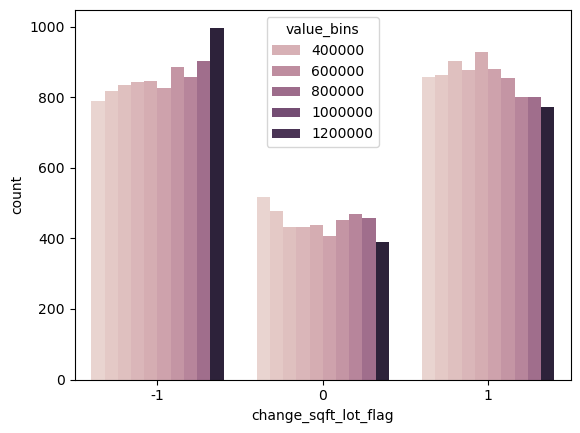

<Figure size 1000x600 with 0 Axes>

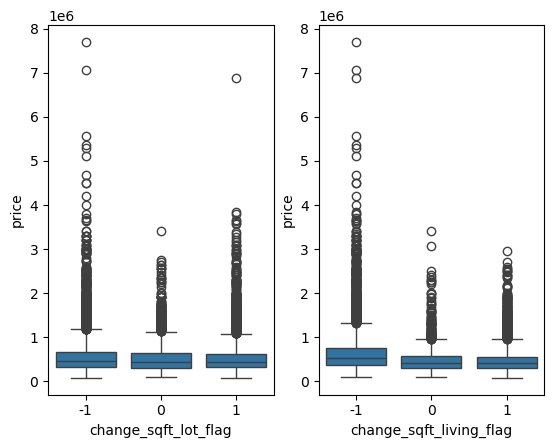

In [12]:
df['value_bins'] = pd.qcut(df['price'], 10, labels=False)
bin_averages = df.groupby('value_bins')['price'].mean() 
df['value_bins'] = df['value_bins'].apply(lambda x: bin_averages[x])
sns.countplot(x='change_sqft_lot_flag', data=df,hue= 'value_bins')
plt.show()

plt.figure(figsize=(10,6))
fig, axs = plt.subplots(1,2)
sns.boxplot(x = 'change_sqft_lot_flag',y = 'price',data=df, ax=axs[0])
sns.boxplot(x = 'change_sqft_living_flag',y = 'price',data=df, ax=axs[1])
plt.show()

this way has a better correlation with price especially in the change of living data.

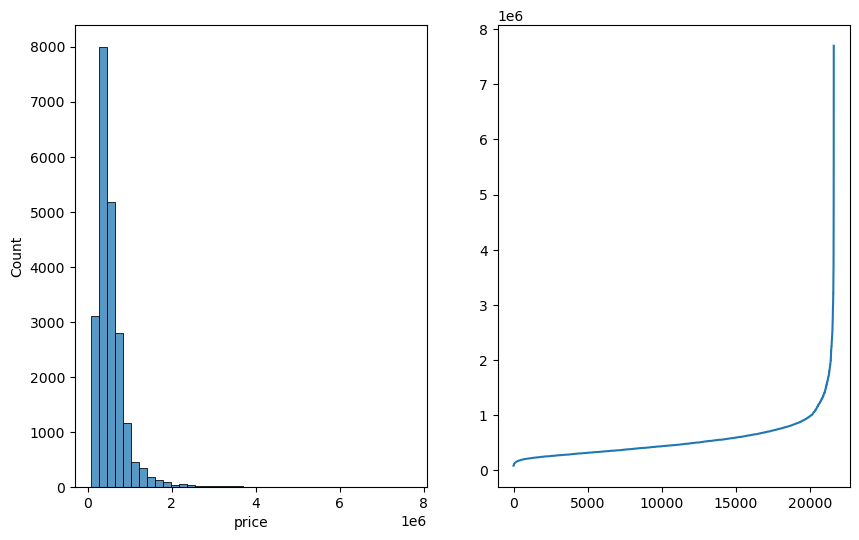

In [13]:

fig, axs = plt.subplots(1,2, figsize = (10,6))
sns.histplot(data=df, x="price",bins = 40, ax = axs[0])

axs[1].plot(df.sort_values('price').reset_index().index, df.sort_values('price').price)
plt.show()

In [41]:
df

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,Cluster_no__5,Cluster_no__6,Cluster_no__7,Cluster_no__8,Cluster_no__9,Cluster_no__10,Cluster_no__11,Cluster_no__12,Cluster_no__13,Cluster_no__14
0,7129300520,2014-10-13,221900,3,1.00,1180,5650,1.0,0,0,...,False,False,True,False,False,False,False,False,False,False
1,6414100192,2014-12-09,538000,3,2.25,2570,7242,2.0,0,0,...,False,False,False,False,False,False,False,False,False,True
2,5631500400,2015-02-25,180000,2,1.00,770,10000,1.0,0,0,...,False,False,False,False,False,False,False,False,False,False
3,2487200875,2014-12-09,604000,4,3.00,1960,5000,1.0,0,0,...,False,False,False,False,False,False,False,False,False,False
4,1954400510,2015-02-18,510000,3,2.00,1680,8080,1.0,0,0,...,False,False,False,False,True,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,263000018,2014-05-21,360000,3,2.50,1530,1131,3.0,0,0,...,False,False,False,True,False,False,False,False,False,False
21609,6600060120,2015-02-23,400000,4,2.50,2310,5813,2.0,0,0,...,False,False,False,False,False,False,False,False,False,False
21610,1523300141,2014-06-23,402101,2,0.75,1020,1350,2.0,0,0,...,False,True,False,False,False,False,False,False,False,False
21611,291310100,2015-01-16,400000,3,2.50,1600,2388,2.0,0,0,...,False,False,False,False,True,False,False,False,False,False


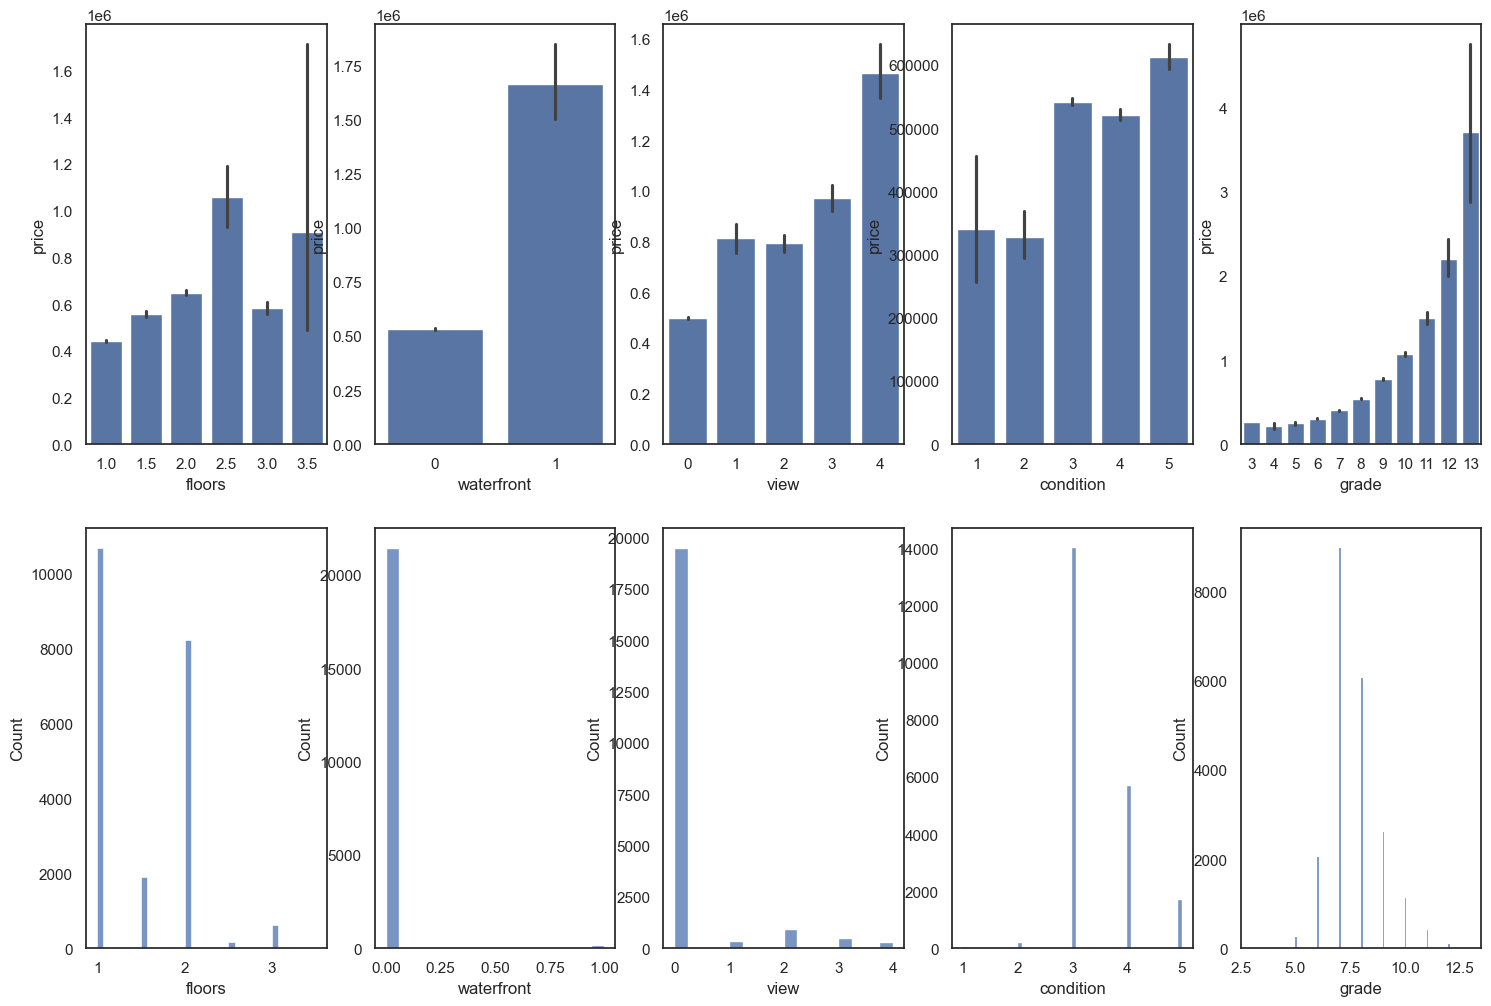

In [44]:
col_list = ['floors', 'waterfront', 'view', 'condition', 'grade']
fig, axs = plt.subplots(2, len(col_list), figsize = (18,12))
for col in col_list:
    sns.barplot(x = col, y = 'price', data = df, ax = axs[0, col_list.index(col)])
    sns.histplot(x = col, ax= axs[1,col_list.index(col)],data = df) 
plt.show()



### extracting groupings from lat long. 

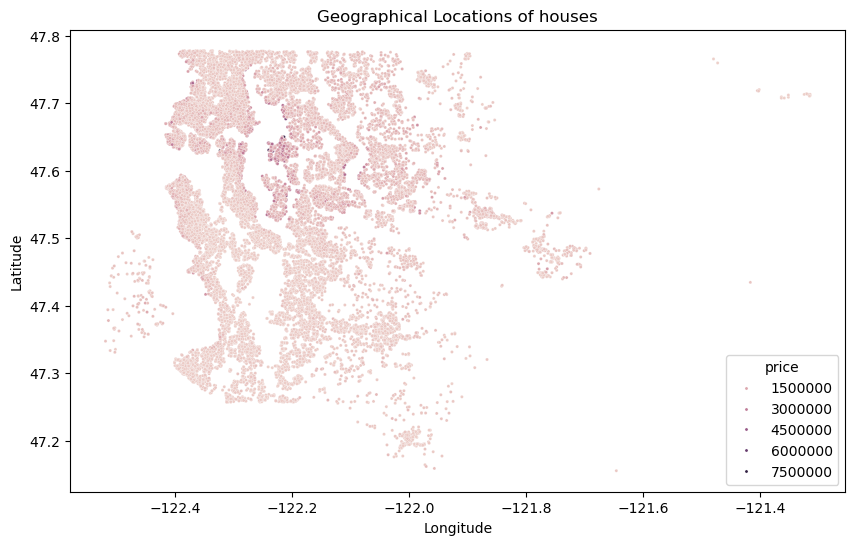

In [14]:
#visualise the plots with colour demarking the prices
plt.figure(figsize=(10, 6))
sns.scatterplot(x='long', y='lat', data=df, hue='price', s=5)
plt.title('Geographical Locations of houses')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.show()

## using Clustering

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import DBSCAN, HDBSCAN
# Normalize the data
coords = df[['lat', 'long']].values
scaler = StandardScaler()
coords_scaled = scaler.fit_transform(coords)

# Run DBSCAN
db = HDBSCAN( min_samples=31).fit(coords)
labels = db.labels_

# Add cluster labels to the DataFrame
df['Cluster'] = labels

plt.figure(figsize=(10, 5))
scatter = plt.scatter(df['long'], df['lat'], c=df['Cluster'], cmap='viridis', s=10)
plt.title('Clusters of Houses for Sale')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.legend(*scatter.legend_elements(), title="Clusters")
plt.show()

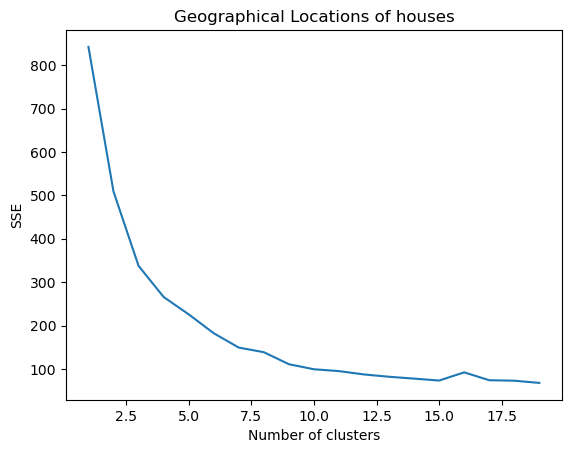

In [15]:

from sklearn.cluster import KMeans

data = df.loc[:,['lat', 'long',]]

sse = {}
for k in range(1, 20):
    kmeans = KMeans(n_clusters=k, max_iter=2000).fit(data)
    data["clusters"] = kmeans.labels_
    #print(data["clusters"])
    sse[k] = kmeans.inertia_ # Inertia: Sum of distances of samples to their closest cluster center

plt.figure()
plt.plot(list(sse.keys()), list(sse.values()))
plt.title('Geographical Locations of houses')
plt.xlabel("Number of clusters")
plt.ylabel("SSE")
plt.show()


it appears that the eblow of the plot suggest that 10 clusters is suitable for clustering. however, I want to check if the clusters selected a suitable for predicting price


#### 10 cluster plot

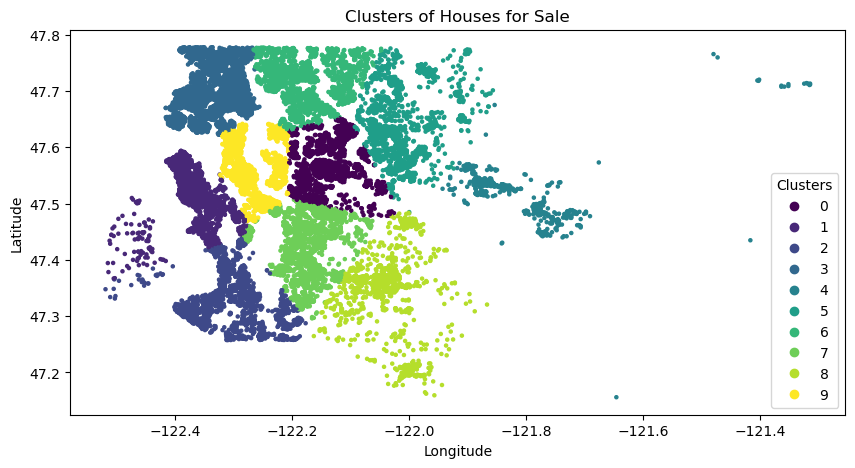

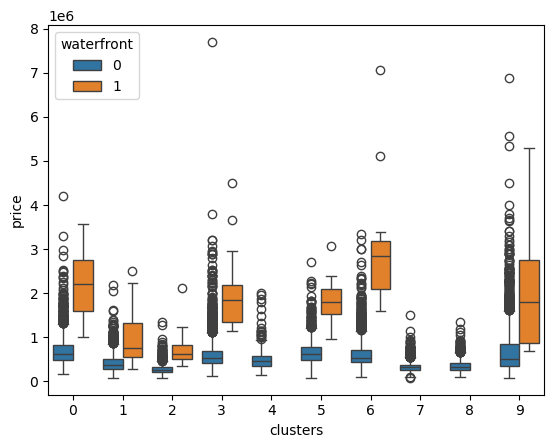

In [16]:
data = df.loc[:,['lat', 'long']]


kmeans = KMeans(n_clusters=10, max_iter=1000).fit(data)
df["clusters"] = kmeans.labels_
plt.figure(figsize=(10, 5))
scatter = plt.scatter(df['long'], df['lat'], c=df['clusters'], cmap='viridis', s=5)
plt.title('Clusters of Houses for Sale')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.legend(*scatter.legend_elements(), title="Clusters")
plt.show()

sns.boxplot(x = 'clusters', y = 'price', data = df,hue = 'waterfront')
plt.show()


#### 15 clusters

Looking at the above graphs it appeared that even though the geographic clusters was sufficient, it failed to cluster to a sufficent level to get the granularity required for to be useful in predicting prices. therefore high number of clusters will be tried. you can see from the first plot that there are 2 clusters in the centre that seem to have higher values than other so a number of clusters was selected to pull out those to groupings. 15 was choosen. 

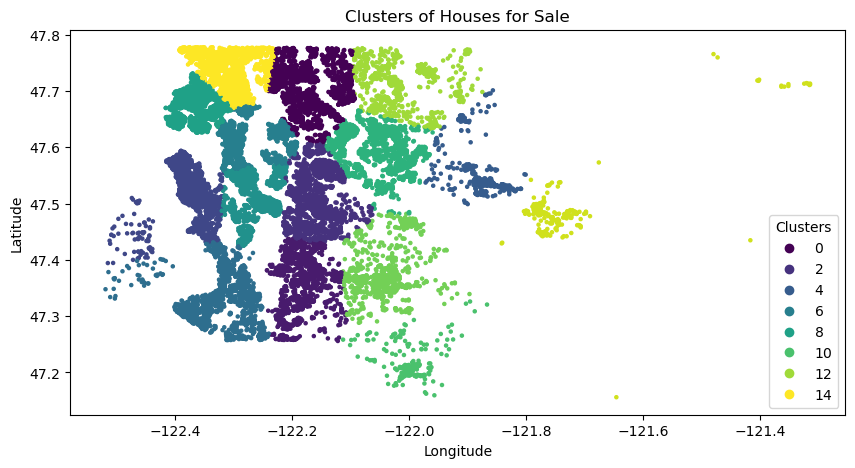

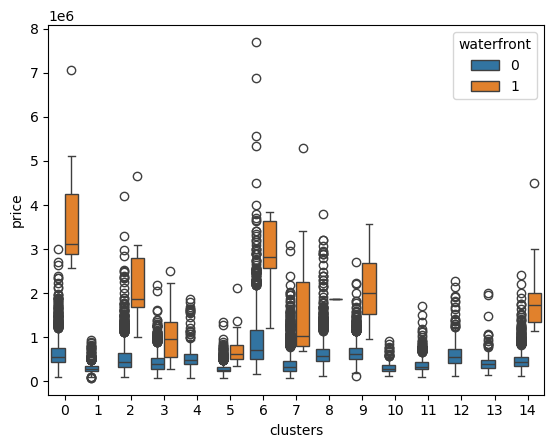

In [17]:

kmeans = KMeans(n_clusters=15, max_iter=1000).fit(data)
df["clusters"] = kmeans.labels_
plt.figure(figsize=(10, 5))
scatter = plt.scatter(df['long'], df['lat'], c=df['clusters'], cmap='viridis', s=5)
plt.title('Clusters of Houses for Sale')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.legend(*scatter.legend_elements(), title="Clusters")
plt.show()

sns.boxplot(x = 'clusters', y = 'price', data = df, hue = 'waterfront')
plt.show()


in reality I would simplely pass the lat longs through and API to get the geographical city names for each address rather than cluster as this doesnt take into account geographic boundarys and just looks to set clusters based on proximity of data points.

In [19]:
encodings_lot = pd.get_dummies(df['change_sqft_lot_flag'], prefix='change_sqft_lot_')
df = pd.concat([df, encodings_lot], axis=1)
encodings_living = pd.get_dummies(df['change_sqft_living_flag'], prefix='change_sqft_living_')
df = pd.concat([df, encodings_living], axis=1)

encodings = pd.get_dummies(df['clusters'], prefix='Cluster_no_')
df = pd.concat([df, encodings], axis=1)


In [20]:
df.columns

Index(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'sqft_living15', 'sqft_lot15', 'age_of_property',
       'change_sqft_living', 'change_sqft_lot', 'value_bins',
       'change_sqft_living_flag', 'change_sqft_lot_flag', 'clusters',
       'change_sqft_lot__-1', 'change_sqft_lot__0', 'change_sqft_lot__1',
       'change_sqft_living__-1', 'change_sqft_living__0',
       'change_sqft_living__1', 'Cluster_no__0', 'Cluster_no__1',
       'Cluster_no__2', 'Cluster_no__3', 'Cluster_no__4', 'Cluster_no__5',
       'Cluster_no__6', 'Cluster_no__7', 'Cluster_no__8', 'Cluster_no__9',
       'Cluster_no__10', 'Cluster_no__11', 'Cluster_no__12', 'Cluster_no__13',
       'Cluster_no__14'],
      dtype='object')

In [21]:
column_list_clusters = ['price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'sqft_living15', 'sqft_lot15', 'age_of_property',
       'change_sqft_living', 'change_sqft_lot', 'Cluster_no__0',
       'Cluster_no__1', 'Cluster_no__2', 'Cluster_no__3', 'Cluster_no__4',
       'Cluster_no__5', 'Cluster_no__6', 'Cluster_no__7', 'Cluster_no__8',
       'Cluster_no__9', 'Cluster_no__10', 'Cluster_no__11', 'Cluster_no__12',
       'Cluster_no__13', 'Cluster_no__14']

column_list_sqft =['price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'sqft_living15', 'sqft_lot15', 'age_of_property',
       'change_sqft_living', 'change_sqft_lot', 'change_sqft_lot__-1', 'change_sqft_lot__0', 'change_sqft_lot__1',
       'change_sqft_living__-1', 'change_sqft_living__0',
       'change_sqft_living__1'] 

<Axes: >

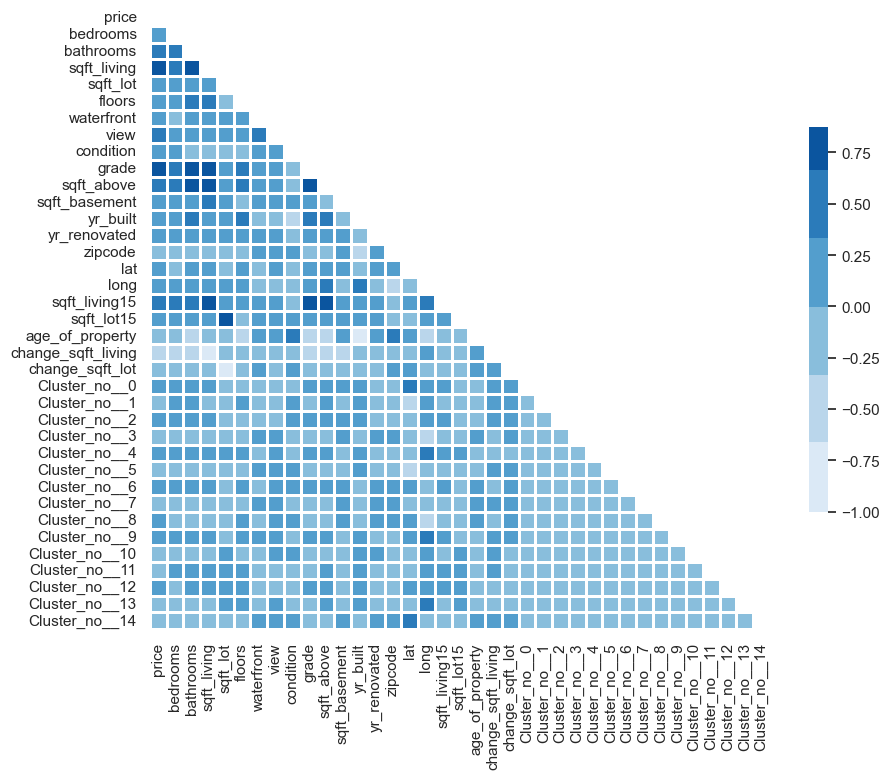

In [45]:
sns.set_theme(style="white")
# encodings = pd.get_dummies(df['clusters'], prefix='Cluster_no_')
# df = pd.concat([df, encodings], axis=1)
# df.sample(5).T
corr = df[column_list_clusters].corr()
mask = np.triu(df[column_list_clusters].corr())
f, ax = plt.subplots(figsize=(10, 10))
cmap = sns.color_palette("Blues")

sns.heatmap(corr, 
            mask=mask, 
            cmap=cmap, 
            # vmax=.3, 
            center=0,
            square=True, 
            linewidths=1, 
            cbar_kws={"shrink": .5}
           )

<Axes: >

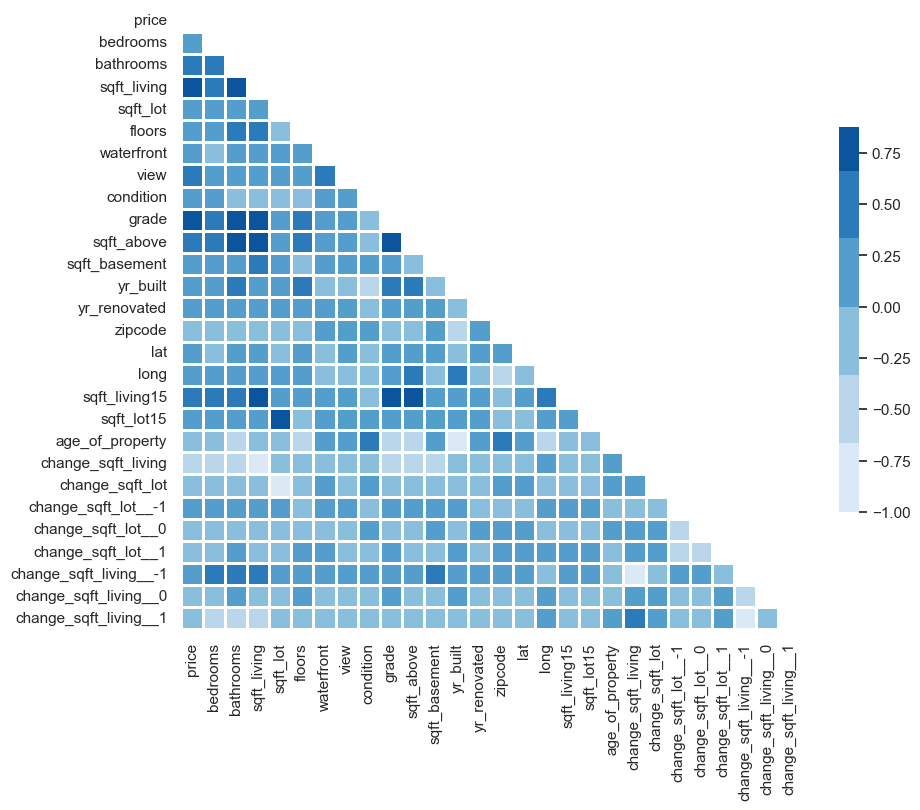

In [46]:
sns.set_theme(style="white")
# encodings = pd.get_dummies(df['clusters'], prefix='Cluster_no_')
# df = pd.concat([df, encodings], axis=1)
# df.sample(5).T
corr = df[column_list_sqft].corr()
mask = np.triu(df[column_list_sqft].corr())
f, ax = plt.subplots(figsize=(10, 10))
cmap = sns.color_palette("Blues")

sns.heatmap(corr, 
            mask=mask, 
            cmap=cmap, 
            center=0,
            square=True, 
            linewidths=1, 
            cbar_kws={"shrink": .5}
           )

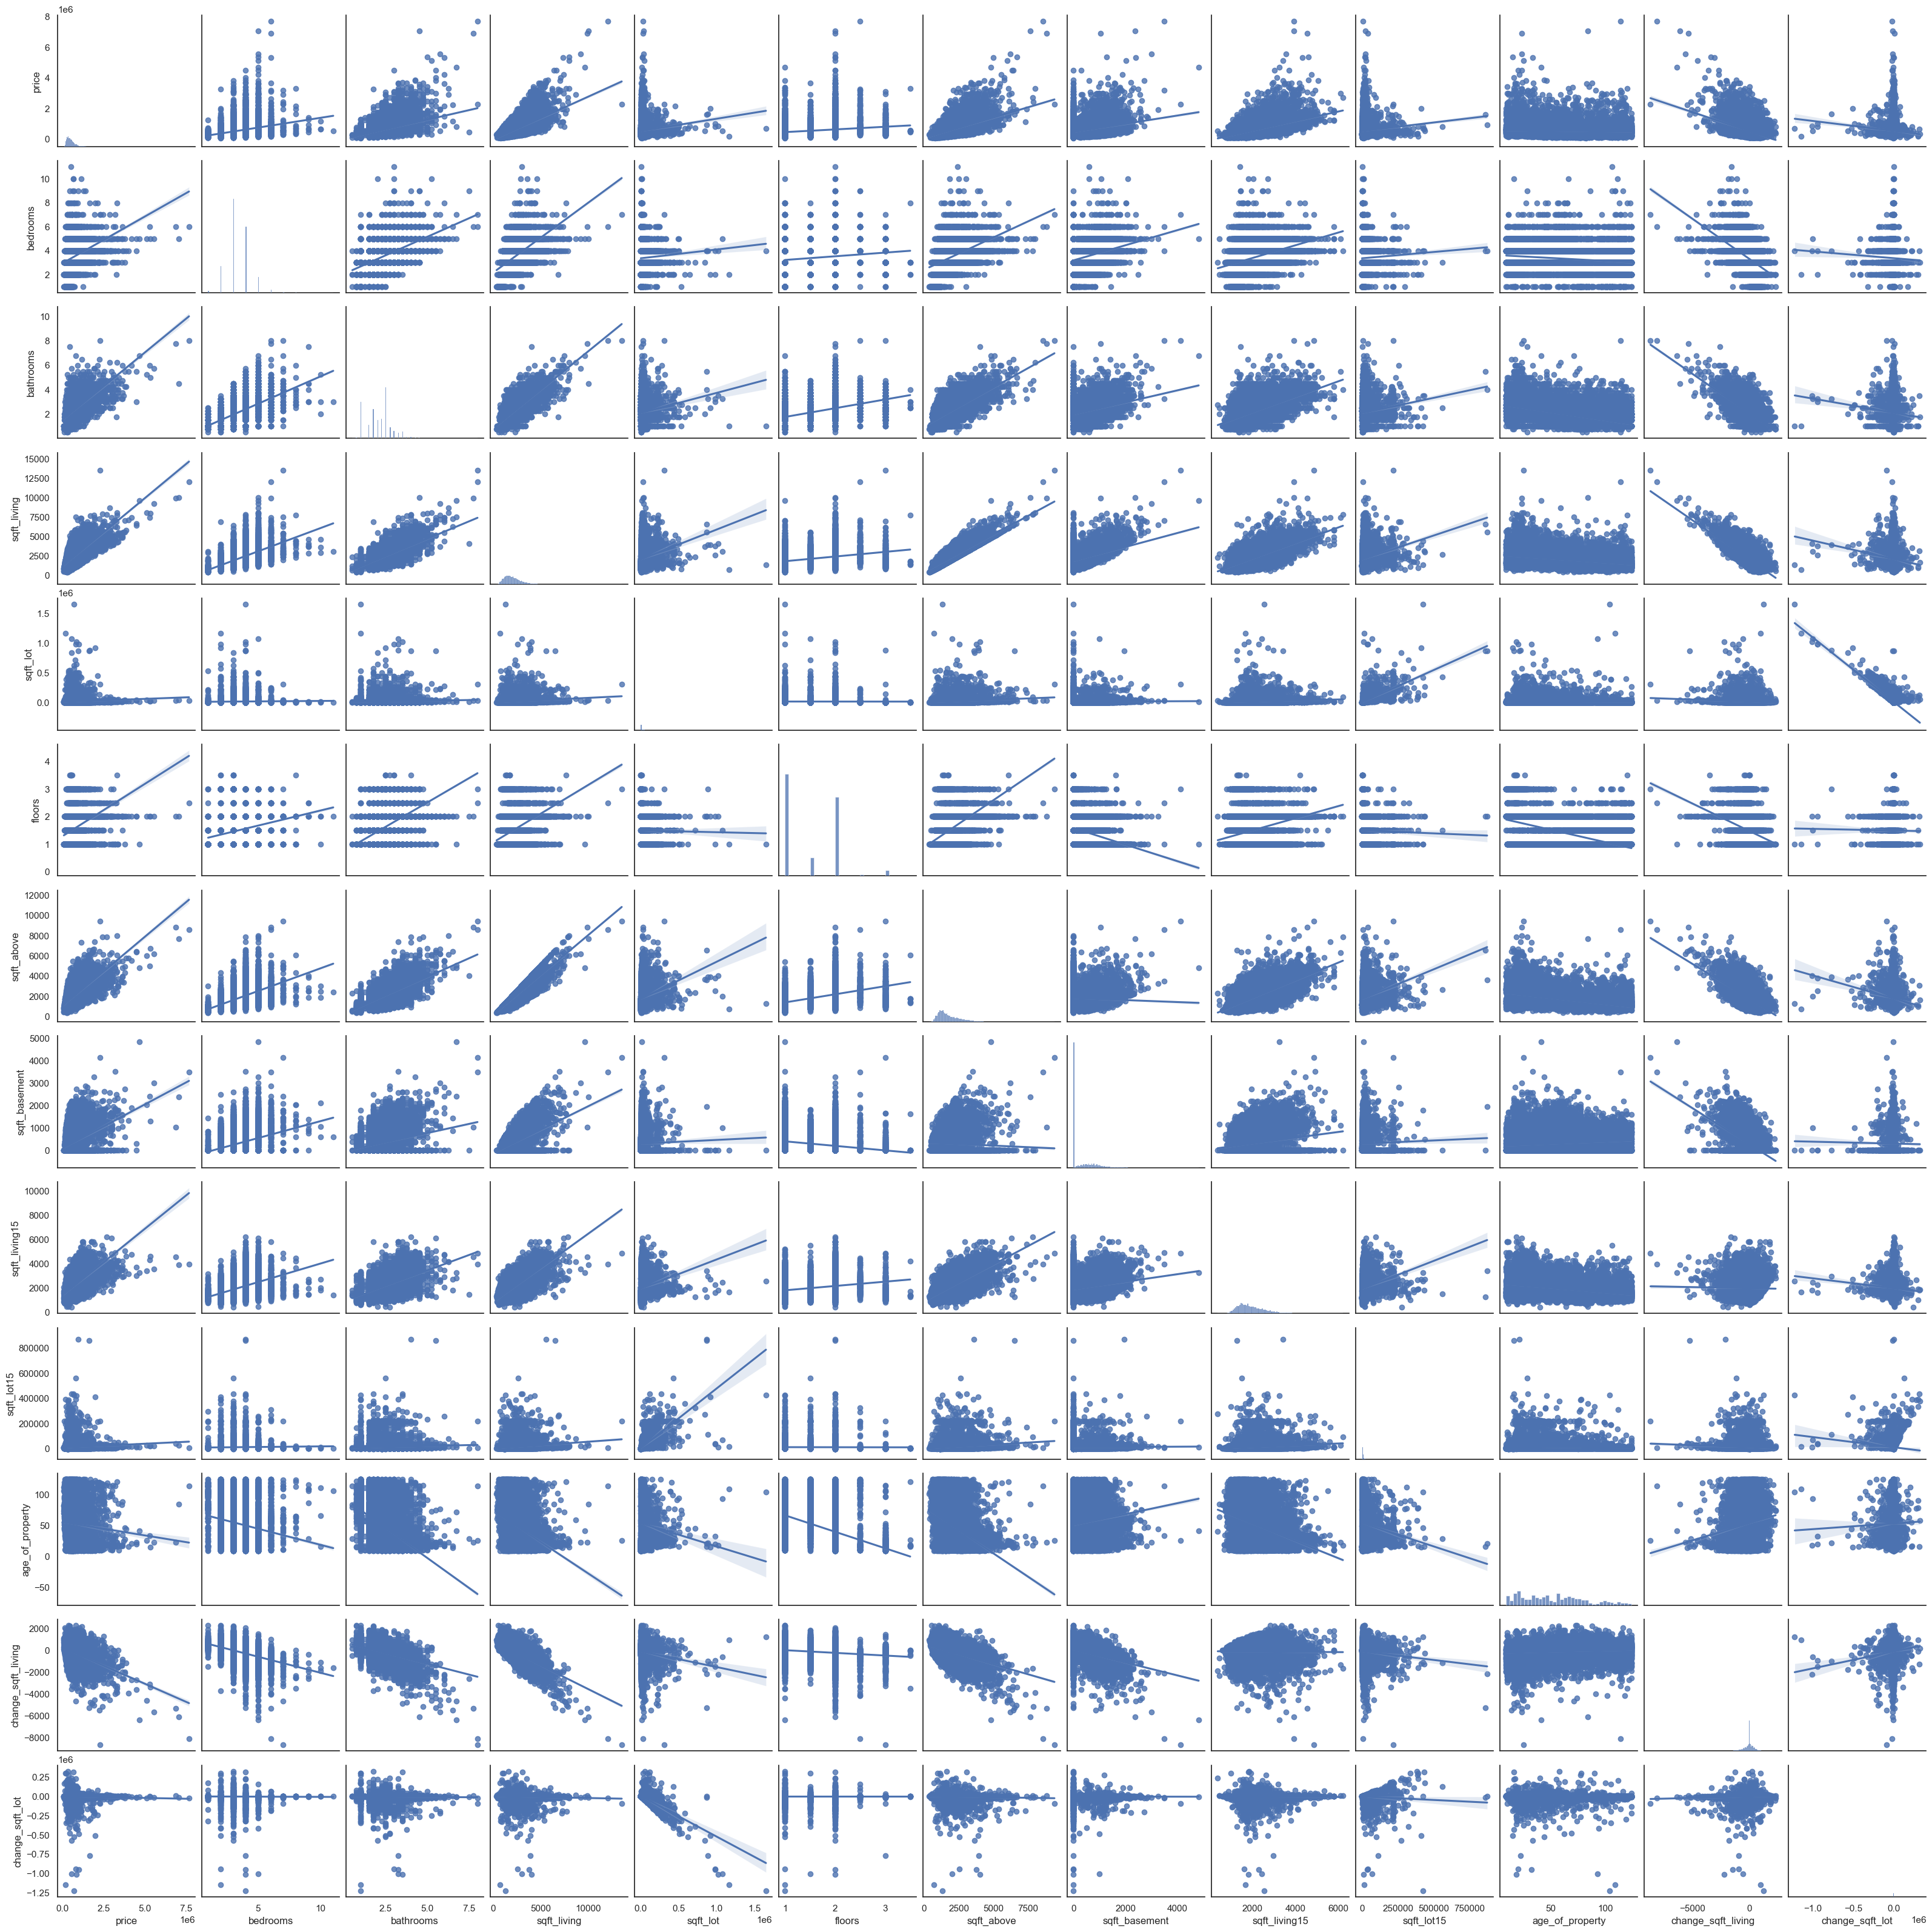

In [24]:
pair_cols = ['price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors',
       'sqft_above', 'sqft_basement','sqft_living15', 'sqft_lot15', 'age_of_property',
       'change_sqft_living', 'change_sqft_lot']
sns.pairplot(df[pair_cols], kind="reg")

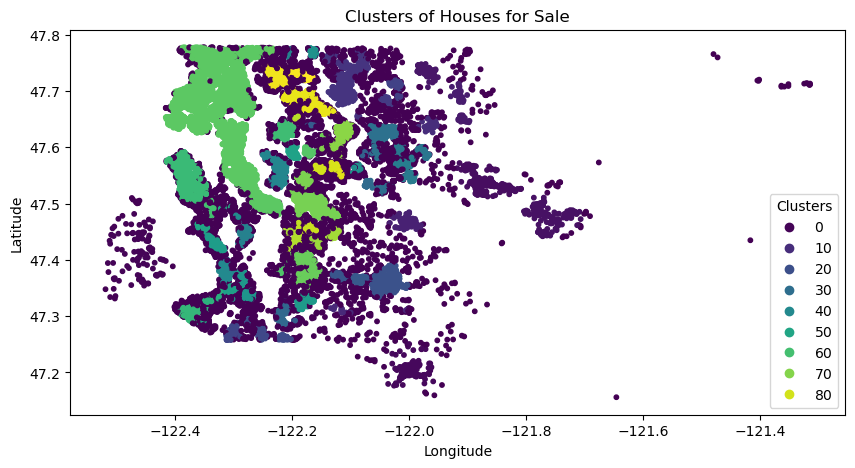

In [ ]:
from sklearn.metrics import silhouette_score
elbow = {}
ss = {}
data = df.loc[:,['lat', 'long',]]
for n_clusters in range(2, 21):
   #iterating through cluster sizes
   clusterer = KMeans(n_clusters = n_clusters, random_state=42)
   cluster_labels = clusterer.fit_predict(data)
   #Finding the average silhouette score
   silhouette_avg = silhouette_score(data, cluster_labels)
   ss[n_clusters] = silhouette_avg
   print("For n_clusters =", n_clusters,"The average silhouette_score is :", silhouette_avg)
   #Finding the average SSE"
   elbow[n_clusters] = clusterer.inertia_ # Inertia: Sum of distances of samples to their closest cluster center
fig = plt.figure(figsize=(14,7))
fig.add_subplot(121)
plt.plot(list(elbow.keys()), list(elbow.values()),'b-',label='Sum of squared error')
plt.xlabel("Number of cluster")
plt.ylabel("SSE")
plt.legend()
fig.add_subplot(122)
plt.plot(list(ss.keys()), list(ss.values()),'b-',label='Silhouette Score')
plt.xlabel("Number of cluster")
plt.ylabel("Silhouette Score")
plt.legend()
plt.show()

In [47]:
df.columns

Index(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'sqft_living15', 'sqft_lot15', 'age_of_property',
       'change_sqft_living', 'change_sqft_lot', 'value_bins',
       'change_sqft_living_flag', 'change_sqft_lot_flag', 'clusters',
       'change_sqft_lot__-1', 'change_sqft_lot__0', 'change_sqft_lot__1',
       'change_sqft_living__-1', 'change_sqft_living__0',
       'change_sqft_living__1', 'Cluster_no__0', 'Cluster_no__1',
       'Cluster_no__2', 'Cluster_no__3', 'Cluster_no__4', 'Cluster_no__5',
       'Cluster_no__6', 'Cluster_no__7', 'Cluster_no__8', 'Cluster_no__9',
       'Cluster_no__10', 'Cluster_no__11', 'Cluster_no__12', 'Cluster_no__13',
       'Cluster_no__14'],
      dtype='object')

## output

-  use kmean with 15 clusters for spacial grouping
- one hot encode categorical features. floors, 
- remove date id, zipcode, lat long. ybuilt 
- add in date since last renovated and ages of building. 
- use flags for change in sqrt footage. 
